In [85]:
import sympy
from sympy import *
from sympy import cos, sin, sinh, exp
from sympy import Function, Symbol
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor, RicciTensor, RicciScalar, EinsteinTensor

sympy.init_printing()

In [97]:
syms = sympy.symbols("t r theta phi")
m, c, a = sympy.symbols("m c a")
A = Function('A')(syms[1])

# using metric values of schwarschild space-time
# a is schwarzschild radius
g = [[0 for i in range(4)] for i in range(4)]
g[0][0] = (c**2)*A**2
g[1][1] = -E**(-(m ** 2)*(sin(syms[2])**2)/(syms[1] ** 2))/(A ** 2)
g[2][2] = -E**(-(m ** 2)*(sin(syms[2])**2)/(syms[1] ** 2))*(syms[1] ** 2)/(A ** 2)
g[3][3] = -(syms[1] ** 2)*(sin(syms[2]) ** 2)/(A ** 2)
metric = MetricTensor(g, syms)
metric.tensor()

⎡ 2  2                                                      ⎤
⎢c ⋅A (r)         0                 0                0      ⎥
⎢                                                           ⎥
⎢              2    2                                       ⎥
⎢            -m ⋅sin (θ)                                    ⎥
⎢            ────────────                                   ⎥
⎢                  2                                        ⎥
⎢                 r                                         ⎥
⎢          -ℯ                                               ⎥
⎢   0      ───────────────          0                0      ⎥
⎢                2                                          ⎥
⎢               A (r)                                       ⎥
⎢                                                           ⎥
⎢                                  2    2                   ⎥
⎢                                -m ⋅sin (θ)                ⎥
⎢                                ────────────               ⎥
⎢       

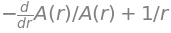

In [98]:
# phi, phi, r
c331 = diff(g[3][3], syms[1])/g[3][3]/2
c331.simplify()

In [99]:
# phi, phi, theta
c332 = diff(g[3][3], syms[2])/g[3][3]/2
c332.simplify()

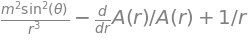

In [100]:
# theta, theta, r
c221 = diff(g[2][2],syms[1])/(2*g[2][2])
c221.simplify()

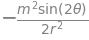

In [101]:
# theta, theta, theta
c222 = diff(g[2][2],syms[2])/(2*g[2][2])
c222.simplify()

In [102]:
# theta, phi, phi
c233 = -diff(g[3][3],syms[2])/(2*g[2][2])
c233.simplify()

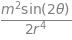

In [103]:
# theta, r, r
c211 = -diff(g[1][1],syms[2])/(2*g[2][2])
c211.simplify()

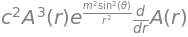

In [104]:
# r, t, t
c100 = -diff(g[0][0],syms[1])/(2*g[1][1])
c100.simplify()

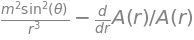

In [105]:
# r, r, r
c111 = diff(g[1][1],syms[1])/(2*g[1][1])
c111.simplify()

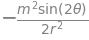

In [106]:
# r, r, theta
c112 = diff(g[1][1],syms[2])/(2*g[1][1])
c112.simplify()

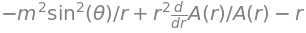

In [107]:
# r, theta, theta
c122 = -diff(g[2][2],syms[1])/(2*g[1][1])
c122.simplify()

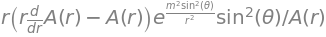

In [108]:
# r, phi, phi
c133 = -diff(g[3][3],syms[1])/(2*g[1][1])
c133.simplify()

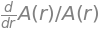

In [72]:
# t, t, r
c001 = diff(g[0][0],syms[1])/(2*g[0][0])
c001.simplify()

In [110]:
ChrSym = ChristoffelSymbols.from_metric(metric)
simplified = ChrSym.simplify()
simplified

⎡                            ⎡           2    2                               
⎢                            ⎢          m ⋅sin (θ)                            
⎢                            ⎢          ──────────                            
⎢                            ⎢               2                                
⎢                            ⎢ 2  3         r      d                          
⎢                            ⎢c ⋅A (r)⋅ℯ          ⋅──(A(r))            0      
⎢                            ⎢                     dr                         
⎢                            ⎢                                                
⎢⎡          d             ⎤  ⎢                                            d   
⎢⎢          ──(A(r))      ⎥  ⎢                                2    2      ──(A
⎢⎢          dr            ⎥  ⎢                               m ⋅sin (θ)   dr  
⎢⎢   0      ────────  0  0⎥  ⎢              0                ────────── - ────
⎢⎢            A(r)        ⎥  ⎢                      

In [112]:
Ric = RicciTensor.from_metric(metric)
Ric.simplify()

⎡                                                                2    2       
⎢                                                               m ⋅sin (θ)    
⎢                                                               ──────────    
⎢   ⎛         2                     2                  ⎞             2        
⎢ 2 ⎜        d            ⎛d       ⎞           d       ⎟  2         r         
⎢c ⋅⎜r⋅A(r)⋅───(A(r)) - r⋅⎜──(A(r))⎟  + 2⋅A(r)⋅──(A(r))⎟⋅A (r)⋅ℯ              
⎢   ⎜         2           ⎝dr      ⎠           dr      ⎟                      
⎢   ⎝       dr                                         ⎠                      
⎢─────────────────────────────────────────────────────────────────────────    
⎢                                    r                                        
⎢                                                                             
⎢                                                                             
⎢                                                   

In [83]:
Einst = EinsteinTensor.from_metric(metric)
Einst.tensor()

⎡      ⎛                                                                      
⎢      ⎜                                                                      
⎢      ⎜                                                                      
⎢      ⎜⎛                                     2                      2        
⎢      ⎜⎜ 2         2    d           3       d           3 ⎛d       ⎞       2 
⎢      ⎜⎜m ⋅A(r)⋅sin (θ)⋅──(A(r)) + r ⋅A(r)⋅───(A(r)) - r ⋅⎜──(A(r))⎟  + 2⋅r ⋅
⎢      ⎜⎜                dr                   2            ⎝dr      ⎠         
⎢      ⎜⎝                                   dr                                
⎢- 0.5⋅⎜──────────────────────────────────────────────────────────────────────
⎢      ⎜                                                3                     
⎢      ⎝                                               r                      
⎢                                                                             
⎢                                                   